# Sklearn Kütüphanesi ile Destek Vektör Makineleri(DVM) Uygulaması

Bu eğitimde Sklearn kütüphanesi kullanarak destek vektör makinesi uygulaması gerçekleştirilecektir. Destek vektör makineleri ile ilgili sunumu [adresinde](https://drive.google.com/file/d/17n0k6QueHjetLLxvvLrjpoN_ghsb3Y1Q/view?usp=sharing) bulabilirsiniz.  

Kullanacağımız kütüphaneler
- numpy
- pandas
- sklearn
- matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm # DVM kütüphanesi
from sklearn.model_selection import train_test_split # eğitim ve test veri seti ayırımı için
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # eğitim kalitesini ölçmek için

## El yazısı rakam tanıma uygulaması

Bu örnekte ele alınacak olan veri seti [bu adreste](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) bulunan veri setidir. Bu veri setinde 0-10 arasındaki rakamlardan oluşan 10 adet sınıf var. Yapacağımız çalışmada veri setini modelleyerek öğretmenli öğrenme gerçekleştirmeye çalışacağız.

In [2]:
veriseti = datasets.load_digits() # 10 adet sınıftan oluşan veri seti

- Sınıf Sayısı: 10
- Her sınıftaki özellik sayısı: ~180
- Toplam örnek sayısı: 1797
- Boyut: 64
- Alınan değerler: 0-16



In [3]:
type(veriseti)

sklearn.utils.Bunch

veriseti sözlük benzeri Bunch yapısındadır ve önemli özellikleri:
1. ‘data’, veriler, 
2. ‘images’, resim değerleri, 
3. ‘target’, çıktı sonuç değerleri (0-10), 
4. ‘target_names’, çıktı etiketleri, 
5. ‘DESCR’, veri setinin tanımı.

In [4]:
veriler = veriseti.data # verisetindeki her bir satırdaki elemanların tutulduğu dizi
veriler[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
resimler = veriseti.images # 8x8 boyutunda numpy dizisi
resimler[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

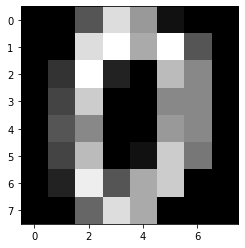

In [6]:
# resim gösterimi yapmak için
plt.gray() # resimleri siyah beyaz göster.
plt.imshow(resimler[0]); # 1. 8x8 piksellik görüntüyü göster
# 0 değeri tam siyah 15 değeri tam beyaz değeri göstermektedir. Aradaki değerler grinin tonlarıdır.

In [7]:
# Sonuçta ortaya çıkan görüntünün hangi sayıya ait olduğunu belirtelim.
ciktilar = veriseti.target # tüm resimlerin sonuçta aldığı gerçek değerler
cikti_isimleri = veriseti.target_names # tüm resimlere ait etiketler

In [8]:
print("gerçek çıktılar: {} değerlerinden oluşur ve {} adet elemana sahiptir.".format(ciktilar, ciktilar.shape))
print("çıktı isimleri: {} değerlerinden oluşur ve {} adet elemana sahiptir.".format(cikti_isimleri, cikti_isimleri.shape))

gerçek çıktılar: [0 1 2 ... 8 9 8] değerlerinden oluşur ve (1797,) adet elemana sahiptir.
çıktı isimleri: [0 1 2 3 4 5 6 7 8 9] değerlerinden oluşur ve (10,) adet elemana sahiptir.


### Öğrenme Aşaması
Verisetini ve özelliklerini tanıdıktan sonraki aşamada veriseti üzerinde DVM kullanarak bir model kurmaya çalışacağız. Bu model toplam 1797 resimden oluşan verisetini eğitim ve test veri seti olarak ikiye bölecek. Daha sonra eğitim verisetini kullanarak veriler arasındaki ilişkiyi ve sonuç verisine nasıl gidildiğini öğrenecek. Sonuçta elde ettiği DVM yapısını test veriseti üzerinde deneyerek ne kadar başarılı olduğunu görmeye çalışacak.

Önce verilerimizi eğitim ve test seti olarak ikiye ayıralım.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(veriler, ciktilar, test_size=0.2, random_state=42) 

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [11]:
model = svm.SVC(gamma=0.001, C=100) # sınıflandırıcı(classifier) gamma yükselirse kalite düşer

In [12]:
model.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
y_predicted = model.predict(X_test)

In [14]:
y_predicted

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [15]:
y_test

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

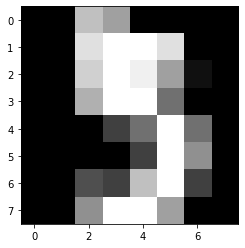

In [16]:
plt.imshow(resimler[5]); # 5. resim

In [17]:
veriler[5] # 5. görselin verileri

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

In [18]:
resimler[5] # 5. görselin matris yapısı

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

In [19]:
ciktilar[5] # 5. görselin çıktısı

5

In [20]:
veriler[5].shape # tek satır ve çok sütunlu hale dönüştürmek gerekiyor.

(64,)

In [21]:
model.predict(veriler[5].reshape(1,-1)) # 5. veriyi modelin tahmini

array([5])

### Eğitimin Performansı 

In [22]:
confusion_matrix(y_test, y_predicted)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 39]], dtype=int64)

In [23]:
accuracy_score(y_test, y_predicted)

0.9888888888888889

In [24]:
classification_report(y_test,y_predicted)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        33\n           1       1.00      1.00      1.00        28\n           2       1.00      1.00      1.00        33\n           3       1.00      0.97      0.99        34\n           4       1.00      1.00      1.00        46\n           5       0.98      0.98      0.98        47\n           6       0.97      1.00      0.99        35\n           7       0.97      0.97      0.97        34\n           8       1.00      1.00      1.00        30\n           9       0.97      0.97      0.97        40\n\n    accuracy                           0.99       360\n   macro avg       0.99      0.99      0.99       360\nweighted avg       0.99      0.99      0.99       360\n'

## Iris Veriseti

In [25]:
iris = datasets.load_iris()

In [26]:
iris_X, iris_y = datasets.load_iris(return_X_y=True) # direkt X ve y şeklinde değerleri almak için

In [27]:
iris_model = svm.SVC()

In [28]:
iris_model.fit(iris_X, iris_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
iris_X[5] # beşinci değerler

array([5.4, 3.9, 1.7, 0.4])

In [30]:
iris_y[5] # beşinci değerin sınıfı

0

In [31]:
iris.target_names[iris_y[5]] # 5. gözlemin sınıf ismi

'setosa'

In [32]:
iris_model.predict(iris_X[5].reshape(1,-1)) # modelin tahmini

array([0])

In [33]:
iris.target_names[iris_model.predict(iris_X[5].reshape(1,-1))] # modelin tahmin sınıfı

array(['setosa'], dtype='<U10')

### Iris Seti Performans Değerleri

In [34]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

In [35]:
iris_y_predicted = iris_model.predict(iris_X_test)

In [36]:
confusion_matrix(iris_y_test,iris_y_predicted)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [37]:
accuracy_score(iris_y_test,iris_y_predicted)

1.0

In [38]:
classification_report(iris_y_test,iris_y_predicted)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

Iris veri setinin test verileri %100 oranda tahmin edilmiş.

Bu örnek [adresindeki](https://scikit-learn.org/) bilgilerden derlenmiştir.

# Okuma ve İzleme Önerileri 

1. https://www.youtube.com/watch?v=g8D5YL6cOSE  (Uygulama)  
2. https://github.com/akshayr89/MNSIST_Handwritten_Digit_Recognition-SVM  (Uygulama)  
3. https://github.com/pramodini18/Digit-recognition-using-SVM  (Uygulama)  
4. https://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction  (Uygulama)
5. https://www.youtube.com/watch?v=_PwhiWxHK8o  (Teorik kısım)